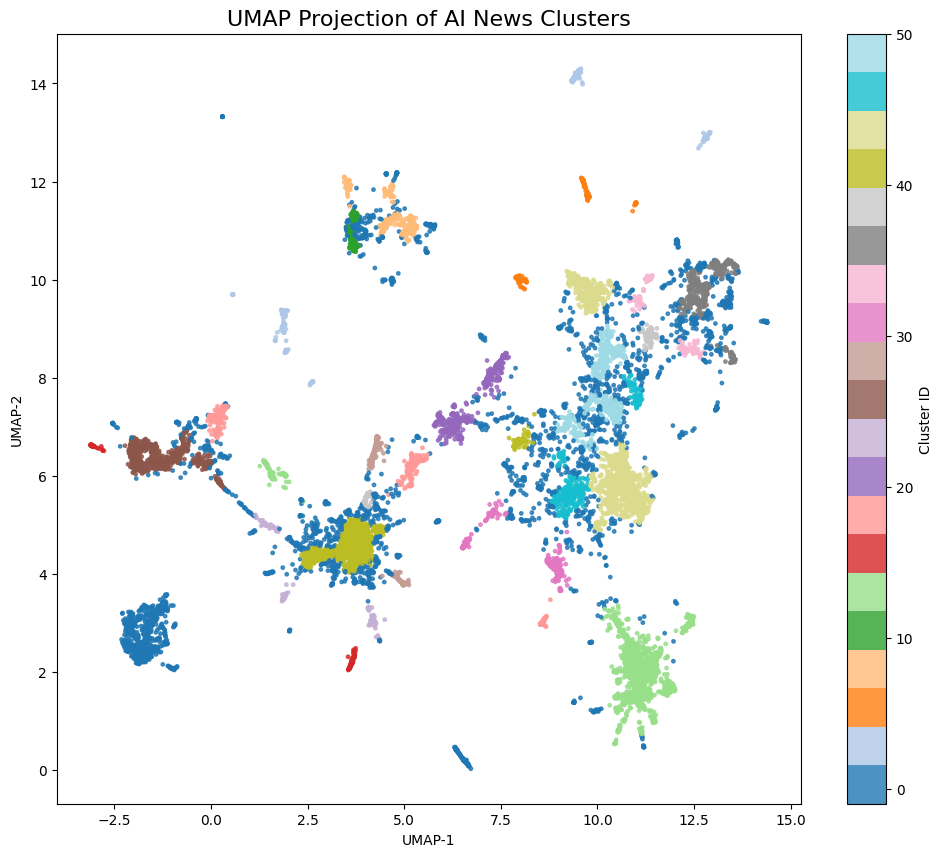

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
reduced = np.load("../results_cluster/01_umap_reduced.npy")
df = pd.read_csv("../results_cluster/02_cluster_labels.csv")

plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    reduced[:,0], reduced[:,1],
    c=df["cluster"],
    cmap="tab20",
    s=6,
    alpha=0.8
)

plt.colorbar(scatter, label="Cluster ID")
plt.title("UMAP Projection of AI News Clusters", fontsize=16)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

plt.savefig("results_cluster/plot_umap_clusters.png", dpi=300, bbox_inches='tight')
plt.show()


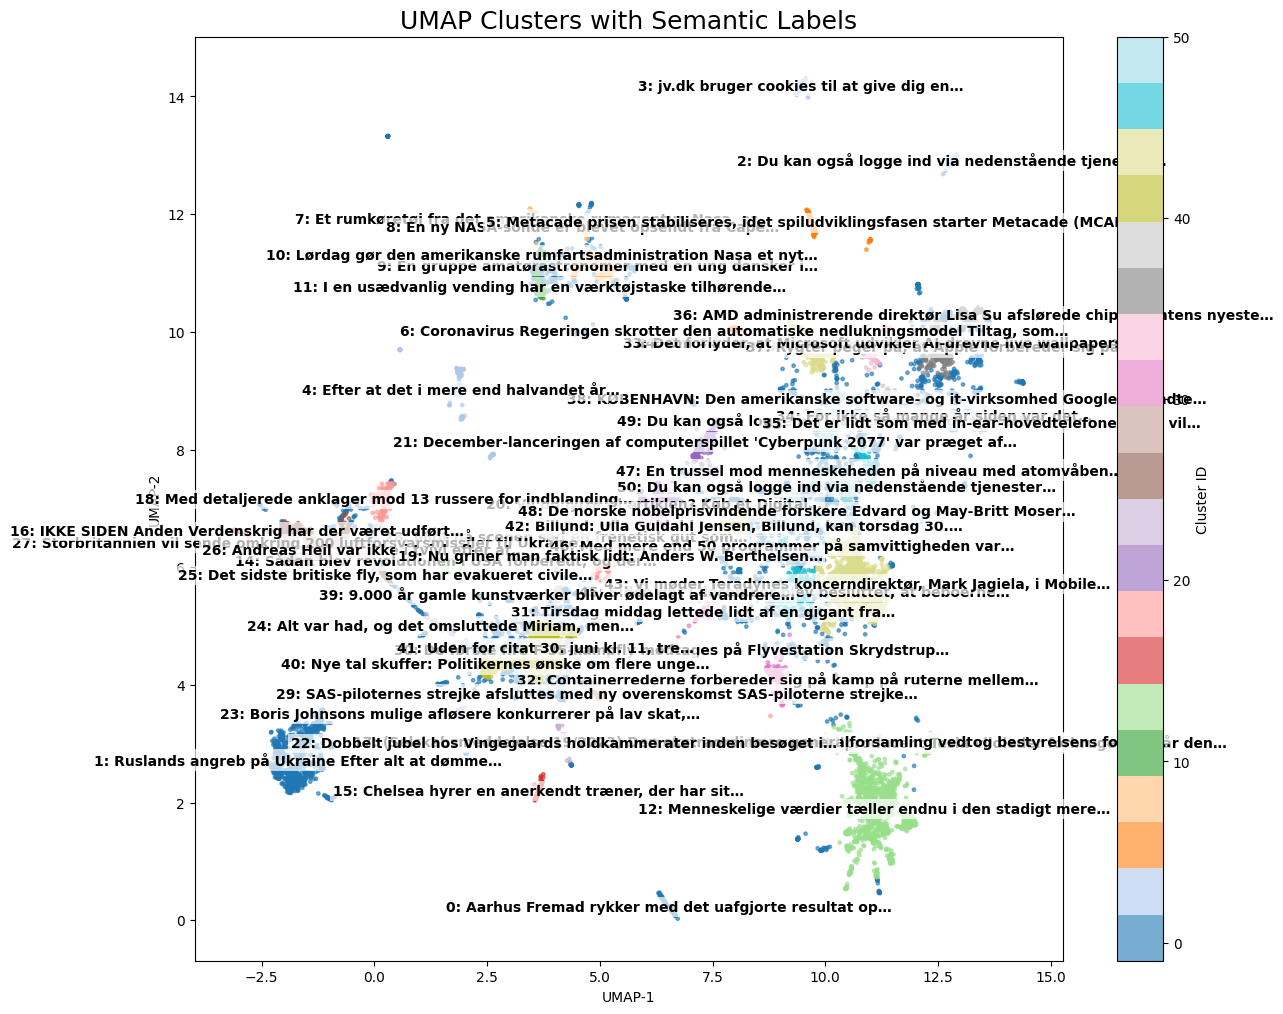

In [3]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load UMAP 结果 (N, 2)
reduced = np.load("../results_cluster/01_umap_reduced.npy")

# Load df with cluster labels
df = pd.read_csv("../results_cluster/02_cluster_labels.csv")

# Load summaries
with open("../results_cluster/05_cluster_label_sentences.json", "r", encoding="utf-8") as f:
    summaries = json.load(f)

# Load centroids (dictionary of cid: vector)
centroids = np.load("../results_cluster/03_cluster_centroids.npy", allow_pickle=True).item()

cluster_coords = {}

for cid in df["cluster"].unique():
    if cid == -1:
        continue  # skip noise cluster
    pts = reduced[df["cluster"] == cid]
    cx, cy = pts[:,0].mean(), pts[:,1].mean()
    cluster_coords[cid] = (cx, cy)

def shorten(text, max_words=8):
    words = text.split()
    if len(words) <= max_words:
        return text
    return " ".join(words[:max_words]) + "…"

cluster_labels = {cid: shorten(label) for cid, label in summaries.items()}
plt.figure(figsize=(14, 12))

# Draw scatter
scatter = plt.scatter(
    reduced[:,0], reduced[:,1],
    c=df["cluster"],
    cmap="tab20",
    s=6,
    alpha=0.6
)

plt.colorbar(scatter, label="Cluster ID")

# Add labels at centroids
for cid, (cx, cy) in cluster_coords.items():
    text = f"{cid}: {cluster_labels[str(cid)]}"
    plt.text(
        cx, cy,
        text,
        fontsize=10,
        weight="bold",
        ha="center",
        va="center",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=2)
    )

plt.title("UMAP Clusters with Semantic Labels", fontsize=18)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

plt.savefig("results_cluster/plot_umap_semantic_labels.png", dpi=300, bbox_inches='tight')
plt.show()


In [4]:
centroids

{np.int64(0): array([ 3.41446325e-02, -7.29964748e-02, -1.76349953e-02,  1.25659257e-02,
        -2.64067482e-02,  3.51713807e-03,  4.28368151e-02,  3.62503827e-02,
        -1.63688371e-03, -2.80462280e-02,  7.35316128e-02,  1.21160652e-02,
         5.51423691e-02,  4.22763266e-02, -2.21915934e-02, -3.46681364e-02,
        -2.19838182e-03,  6.70470251e-03, -6.06158674e-02, -2.26829574e-02,
         4.14616987e-03,  2.68146526e-02, -5.29810004e-02,  2.60670111e-02,
         2.74600349e-02,  1.46171572e-02, -7.85531756e-03, -3.58548090e-02,
         5.34308590e-02, -1.25574879e-02, -2.43828236e-03,  2.17937678e-02,
         4.62954259e-03,  1.09787537e-02,  3.15082707e-06, -3.37344594e-02,
        -2.96914876e-02,  1.94956064e-02, -3.25893909e-02, -7.42521929e-03,
         8.28476027e-02,  1.95609201e-02,  5.84444683e-03, -3.20810005e-02,
         2.85187345e-02, -2.90096309e-02,  1.28790727e-02, -2.86782924e-02,
        -4.62670624e-03,  2.13089120e-02,  1.33020515e-02, -4.24009450e-02,